In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

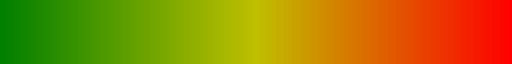

In [10]:
from  matplotlib.colors import LinearSegmentedColormap
gyr_cmap=LinearSegmentedColormap.from_list('rg',["g", "y", "r"], N=256) 
gyr_cmap

In [11]:
sweep_result = pd.read_csv("../output_sweep/result.csv")
sweep_result.columns

Index(['events', 'particles', 'pmin', 'pmax', 'core_quantile', 'components',
       'weight_cutoff', 'timing', 'n_tracks', 'n_outliers', 'res_LOC0_mean',
       'res_LOC0_rms', 'pull_LOC0_mean', 'pull_LOC0_std', 'res_LOC1_mean',
       'res_LOC1_rms', 'pull_LOC1_mean', 'pull_LOC1_std', 'res_PHI_mean',
       'res_PHI_rms', 'pull_PHI_mean', 'pull_PHI_std', 'res_THETA_mean',
       'res_THETA_rms', 'pull_THETA_mean', 'pull_THETA_std', 'res_QOP_mean',
       'res_QOP_rms', 'pull_QOP_mean', 'pull_QOP_std'],
      dtype='object')

In [12]:
sweep_result["timing_ms"] = 1e3 * sweep_result["timing"]
sweep_result["outlier_ratio"] = sweep_result["n_outliers"] / sweep_result["n_tracks"]

In [13]:
sweep_result[["n_tracks", "n_outliers", "outlier_ratio", "timing_ms","components","weight_cutoff", "res_QOP_mean", "res_QOP_rms", "pull_QOP_mean","pull_QOP_std"]]

,n_tracks,n_outliers,outlier_ratio,timing_ms,components,weight_cutoff,res_QOP_mean,res_QOP_rms,pull_QOP_mean,pull_QOP_std
0,1298,222,0.171032,970.7,8,1.000000e-02,-0.011126,0.054767,-0.528370,1.964685
1,1294,201,0.155332,1367.0,8,1.000000e-04,-0.005999,0.045861,-0.123985,0.764711
2,1297,193,0.148805,2834.0,16,1.000000e-04,-0.007208,0.051966,-0.131296,0.773031
3,1293,210,0.162413,1779.0,8,1.000000e-08,-0.005647,0.047830,-0.107553,0.767074
4,1299,221,0.170131,1606.0,16,1.000000e-02,-0.011687,0.053354,-0.819596,2.806969
5,1299,306,0.235566,239.4,1,1.000000e-08,-0.001147,0.068451,0.124341,0.717200
6,1299,306,0.235566,238.0,1,1.000000e-04,-0.001147,0.068451,0.124341,0.717200
7,1300,291,0.223846,228.6,1,1.000000e-02,-0.002565,0.046154,0.056668,0.950562
8,1294,202,0.156105,4124.0,16,1.000000e-08,-0.006774,0.063469,-0.114829,0.764586


In [24]:
def plot_for_key(ax):
    ax.scatter(sweep_result["components"], sweep_result["weight_cutoff"], s=400, c=abs(sweep_result[key]), cmap=gyr_cmap)
    for row in sweep_result[["components","weight_cutoff",key]].to_numpy():
        ax.text(row[0], row[1], "{:.3f}".format(row[2]), fontdict={"size": 12}, horizontalalignment='center', verticalalignment='center')
    ax.set_yscale('log')
    ax.set_xlabel("components")
    ax.set_ylabel("weight cutoff")
    ax.set_title(key, fontweight="bold")

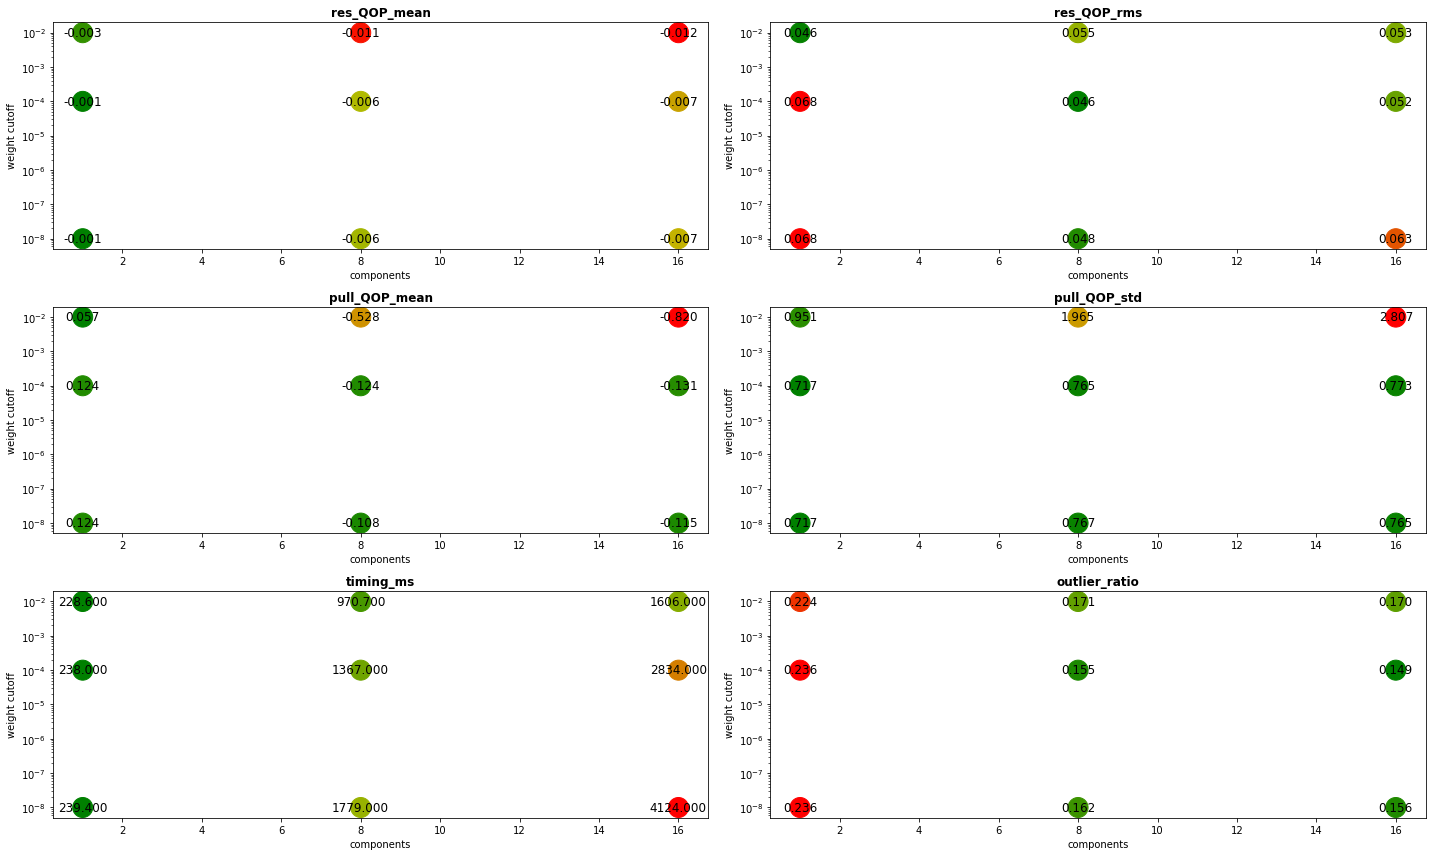

In [25]:
fig, axes = plt.subplots(3,2,figsize=(20,12))

for ax, key in zip(axes.flatten(), ["res_QOP_mean", "res_QOP_rms", "pull_QOP_mean","pull_QOP_std", "timing_ms", "outlier_ratio"]):
    plot_for_key(ax)
    
fig.tight_layout()